# Experiment: Compare Previous Disengaged

**Goal**: Compare models with various disengaged regressors- combined, on their own or alone.

Additional Notes

Related notebooks:

* `2024_03_20_tau_sweep_prev_disengaged_combo.ipynb`
* `2024_03_20_tau_sweep_prev_disengaged_binary_combo.ipynb`

> Written by Jess Breda 

Models being compared:

1. Base model (psytrack features)
2. Only prev violation
3. Only prev tns
4. Only filt prev violation
5. Only filt prev tns
6. Prev viol abd prev tns
7. Filt prev viol and filt prev tns
8. prev tns + prev viol then filt combo
9. n prev tns + prev viol then filt combo (maybe)

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment

from multiglm.experiments.experiment_compare_models import ExperimentCompareModels

from multiglm.features.design_matrix_generator import *
from multiglm.features.design_matrix_generator_PWM import *

from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression

from multiglm.visualizations.model_visualizer import ModelVisualizerCompare

from multiglm.data import ANIMAL_IDS
from multiglm.experiments import STANDARD_SIGMAS


sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

### Compare 

In [2]:
# design matrix columns shared between all models being fit
shared_cols = {
    "session": lambda df: (copy(df.session)),
    "bias": lambda df: (add_bias_column(df)),
    "s_a": lambda df: (standardize(df.s_a)),
    "s_b": lambda df: (standardize(df.s_b)),
    "prev_avg_stim": lambda df: (prev_avg_stim(df, mask_prev_violation=True)),
    "prev_correct": lambda df: (prev_correct_side(df)),
    "prev_choice": lambda df: (prev_choice(df)),
    "labels": {"column_name": "choice"},
}

models_config = {
    "prev_tns_only": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_tns": lambda df: (prev_trial_not_started(df)),
        },
    },
    "base": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
        },
    },
    "prev_viol_only": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_viol": lambda df: (prev_violation(df)),
        },
    },
    "filt_prev_viol_only": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "filt_prev_viol": lambda df: (
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation"))
            ),
        },
    },
    "binary_prev_tns_and_viol": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_viol": lambda df: (prev_violation(df)),
            "prev_tns": lambda df: (prev_trial_not_started(df)),
        },
    },
    "binary_prev_tns_viol_added": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_viol_tns": lambda df: combine_two_cols(
                prev_violation(df),
                prev_trial_not_started(df),
                operator.add,
            ),
        },
    },
}
# "filt_prev_tns_only": {
#     "model_class": MultiClassLogisticRegression,
#     "dmg_config": {
#         **shared_cols,
#         "filt_prev_tns": lambda df: exp_filter_column(
#             prev_trial_not_started(df),
#             df.session,
#             get_animals_tau(df, var_name="prev_trial_not_started")
#         ),
#     },
# },

# }

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": STANDARD_SIGMAS,
    "random_state": 47,
    "eval_train": True,
    "null_mode": "multi",
    "model_config": models_config,
}

save_name = "2024_03_20_compare_prev_disengaged_no_filt.pkl"

ORDER = [
    "base",
    "prev_viol_only",
    "filt_prev_viol_only",
    "prev_tns_only",
    "binary_prev_tns_and_viol",
    "binary_prev_tns_viol_added",
]

## Run

In [3]:
experiment = ExperimentCompareModels(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<

 ***** evaluating model prev_tns_only w/ sigma 0.07 *****
Optimization terminated successfully.
         Current function value: 64969.072609
         Iterations: 27
         Function evaluations: 45
         Gradient evaluations: 45

 ***** evaluating model prev_tns_only w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64694.617404
         Iterations: 28
         Function evaluations: 47
         Gradient evaluations: 47

 ***** evaluating model prev_tns_only w/ sigma 0.25 *****
         Current function value: 64578.136529
         Iterations: 26
         Function evaluations: 76
         Gradient evaluations: 65

 ***** evaluating model prev_tns_only w/ sigma 0.5 *****
         Current function value: 64533

## Visualize

In [4]:
experiment = load_experiment(save_name)
mvc = ModelVisualizerCompare(experiment)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_31486/2431235986.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for model_name, model_df in df.groupby("model_name"):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

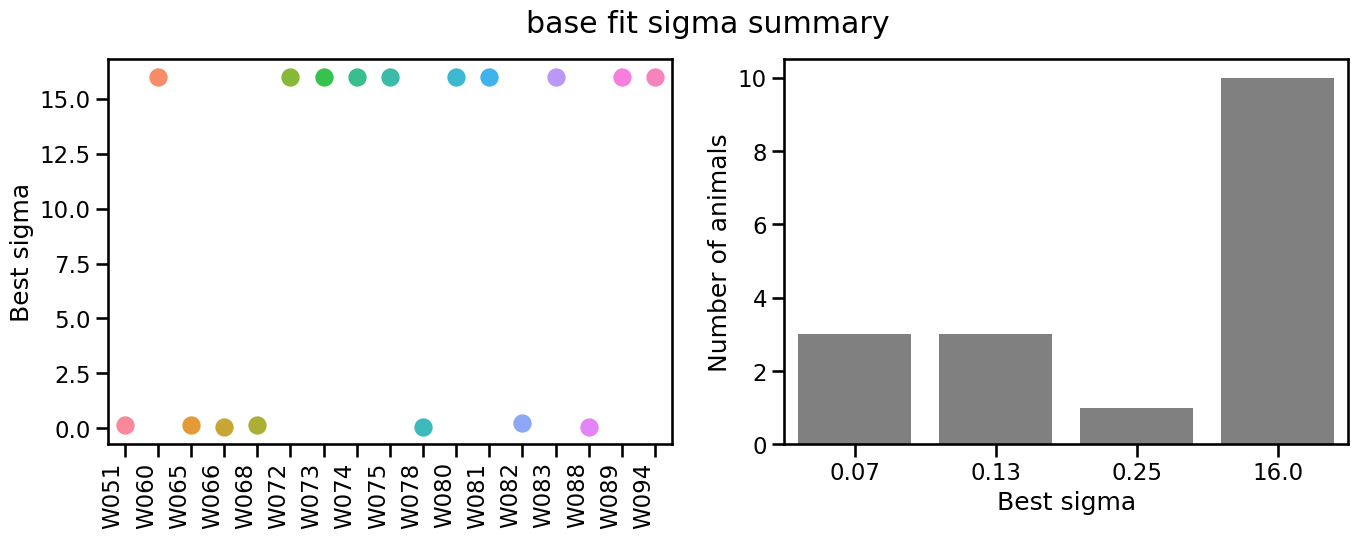

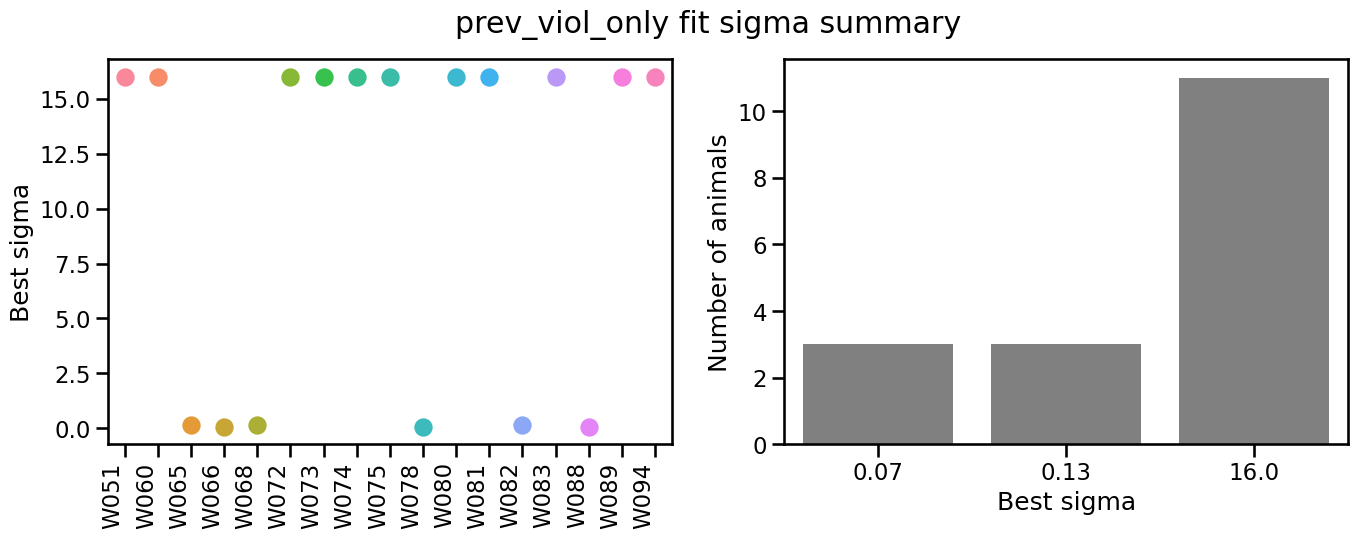

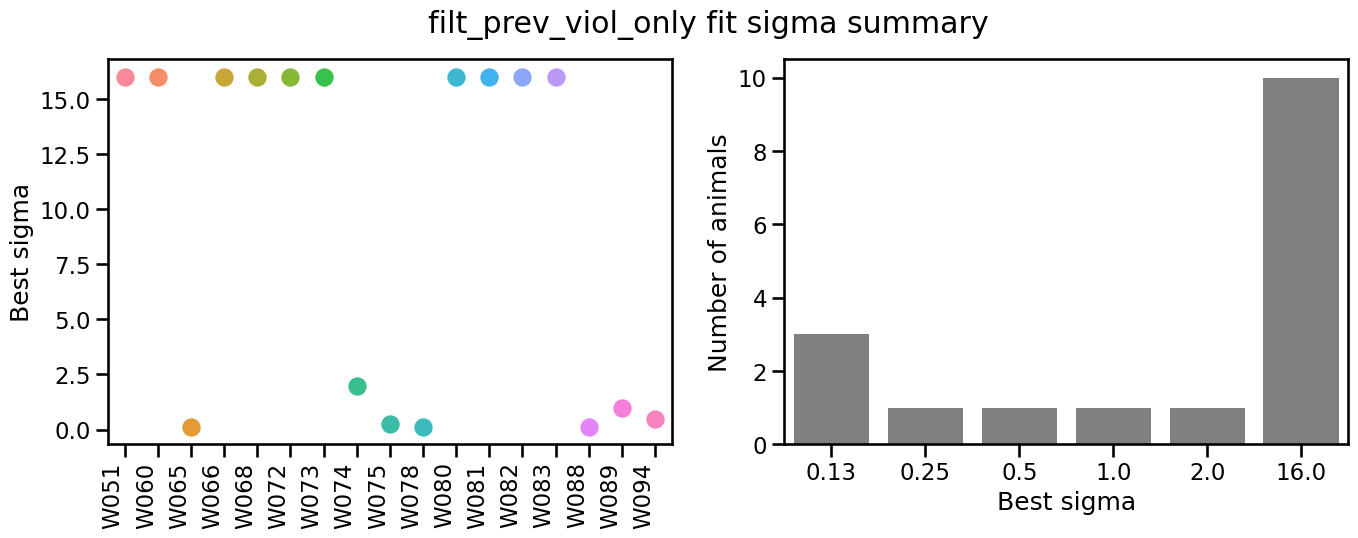

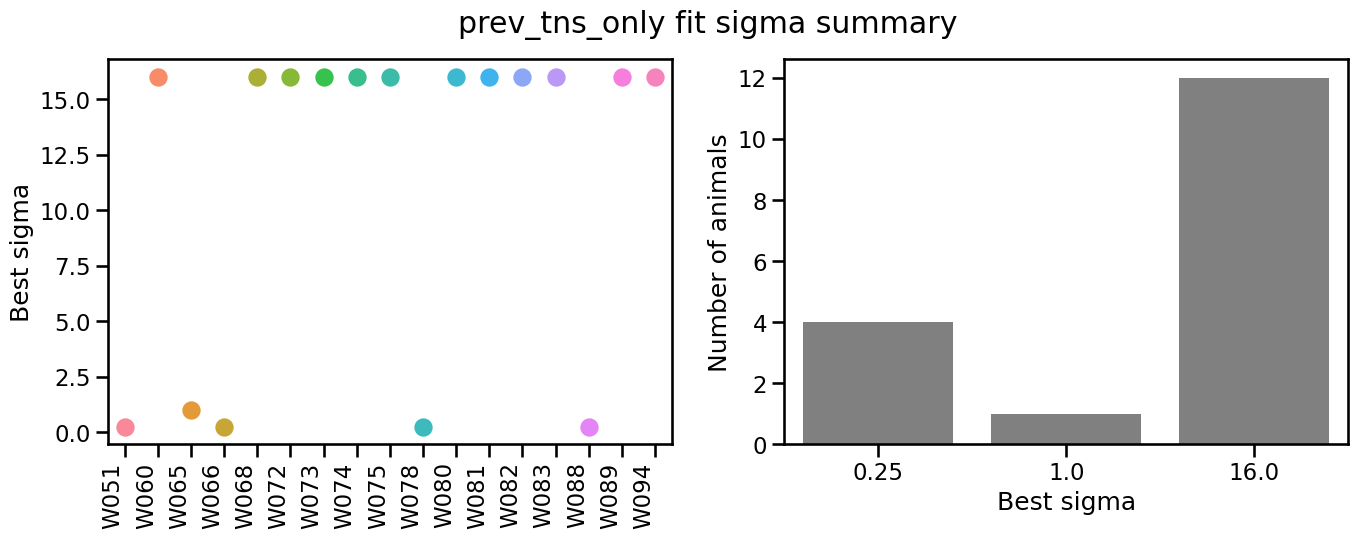

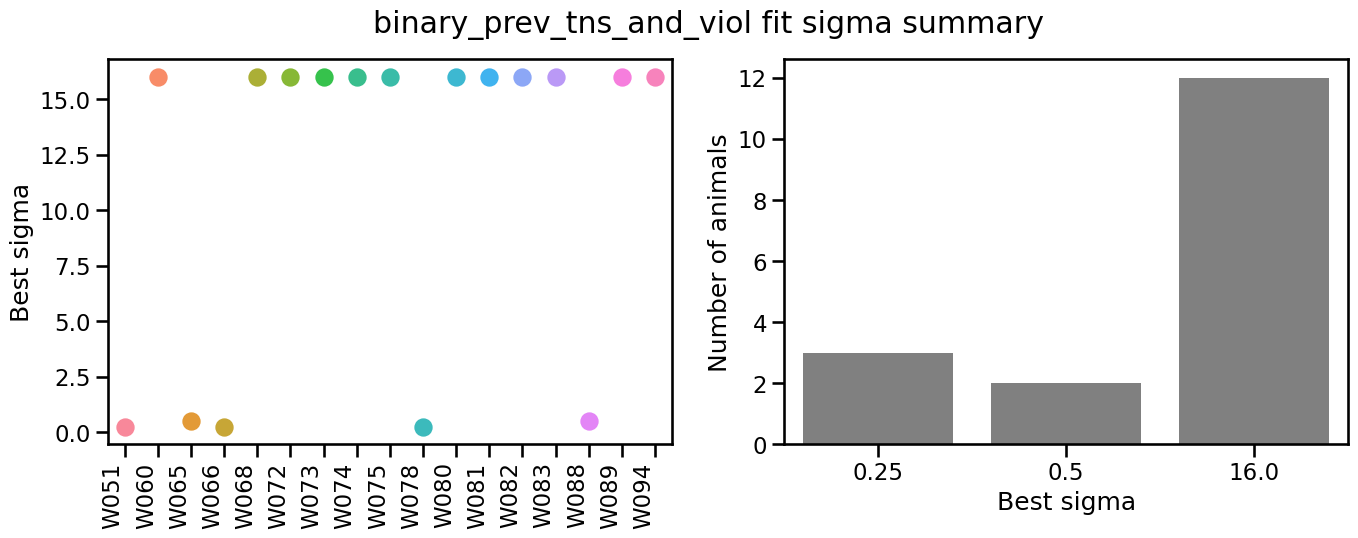

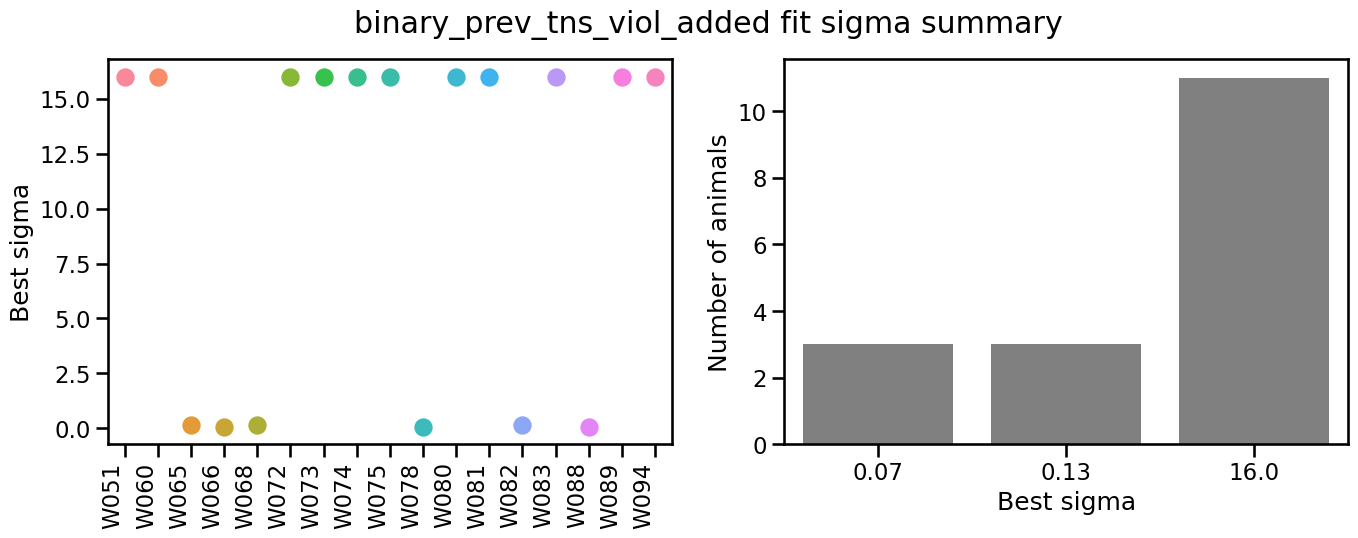

In [5]:
df = mvc.find_best_fit(group="model_name")
df["model_name"] = pd.Categorical(df["model_name"], categories=ORDER, ordered=True)
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_31486/2667047998.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ii, (model_name, model_df) in enumerate(best_fit_by_model.groupby("model_name")):


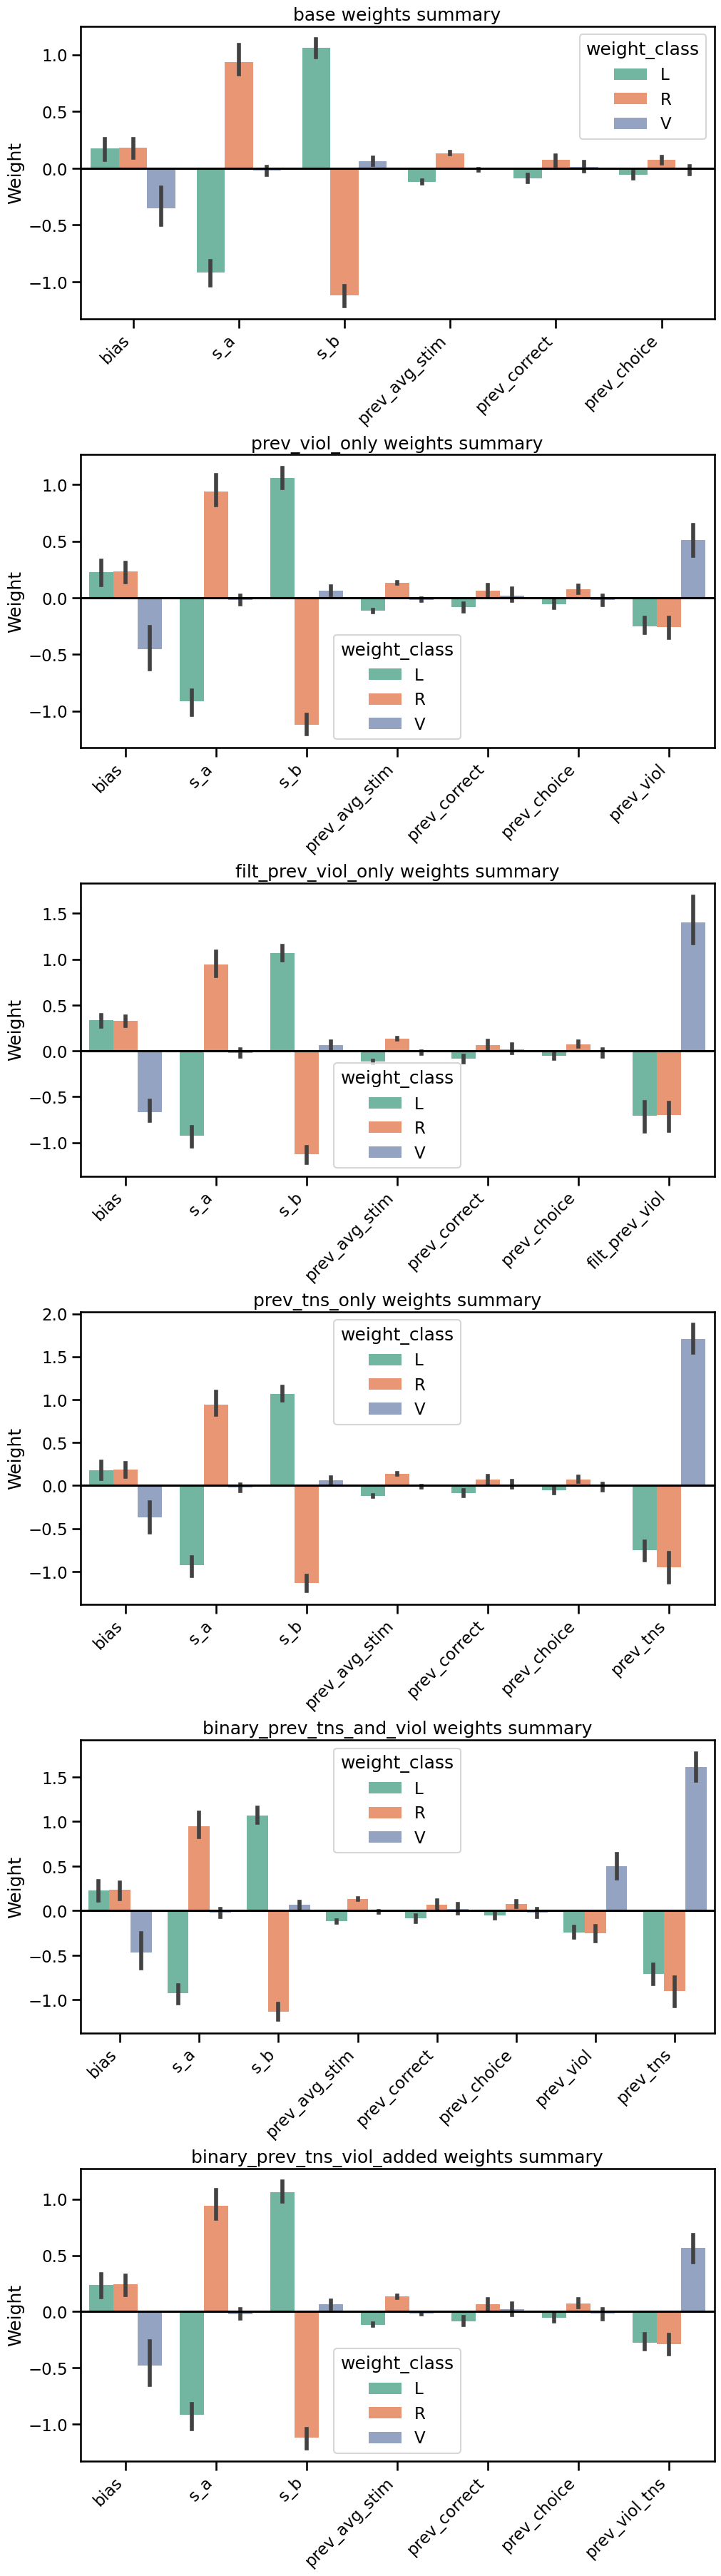

In [6]:
fig, ax = plt.subplots(
    len(ORDER), 1, figsize=(10, len(ORDER) * 6), constrained_layout=True, sharey=False
)

best_fit_by_model = mvc.find_best_fit(group=["animal_id", "model_name"])
best_fit_by_model["model_name"] = pd.Categorical(
    best_fit_by_model["model_name"], categories=ORDER, ordered=True
)

for ii, (model_name, model_df) in enumerate(best_fit_by_model.groupby("model_name")):
    unpacked = mvc.unpack_features_and_weights(model_df)

    mvc.plot_weights_summary(
        df=unpacked,
        ax=ax[ii],
        palette="Set2",
        title=f"{model_name} weights summary",
    )

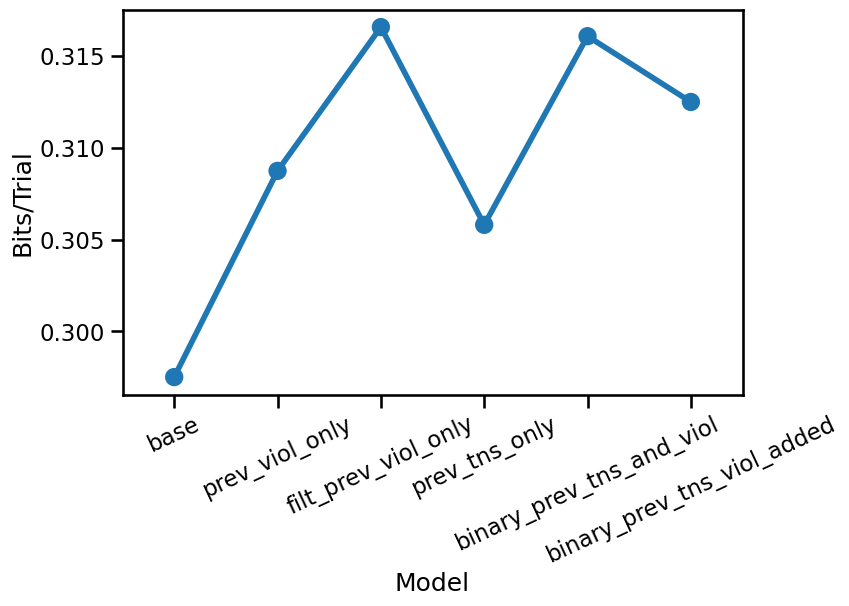

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=ORDER,
    errorbar=None,
)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


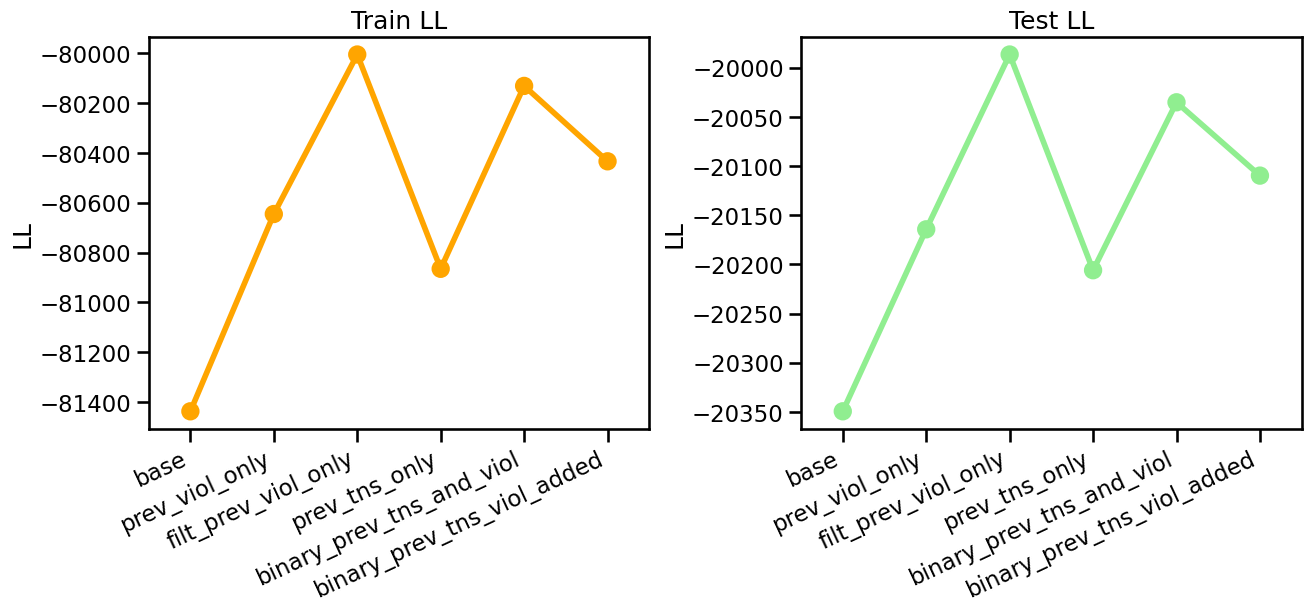

In [8]:
mvc.plot_train_and_test_ll(
    order=ORDER,
    errorbar=None,
)

<Axes: title={'center': 'Model Improvement- mu: 185.02 std: 153.69 \n base -> prev_viol_only'}, xlabel='animal_id', ylabel='Delta test LL (new - base)'>

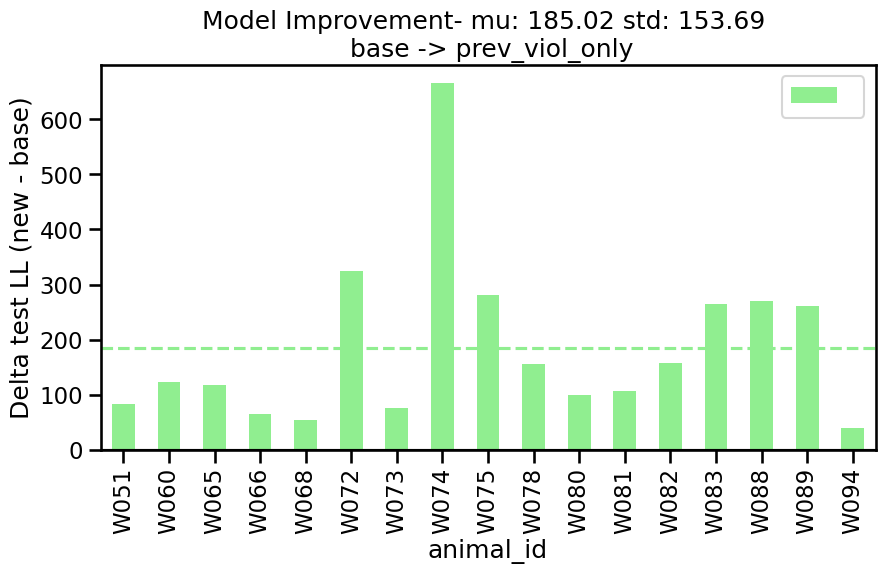

In [9]:
mvc.plot_ll_delta_by_animal(
    base_model_name=ORDER[0],
    new_model_name=ORDER[1],
    type="test",
)